In [10]:
import numpy as np
import pandas as pd

#Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

In [11]:
#Load in the DF of tweets
tweet_df = pd.read_csv('tweets1.csv', index_col=0, encoding='utf-8')

#Consider only tweets from the US
tweet_df = tweet_df[tweet_df.country == 'United States']

#Load in the dataframe of word-happiness rankings
sent_df = pd.DataFrame.from_csv('Data_Set_S1.txt', sep='\t', index_col=None)

#Load in stopwords
cachedStopWords = stopwords.words("english")

Let's prepare some regular expressions to handle abbreviations that people sometimes extend for emphasis like 'lollllll' or 'lmaoooo' or 'hahaha'. (Haven't finished this yet).
#Actually, none of this regex stuff is working yet

In [12]:
import re


#NEED TO GET THIS WORKING
#emph_stem = lambda s: re.sub(r'(\w)([\w]*)','\\2', s)

#this has it's own happiness rating
lolol = lambda s: re.sub(r'lolol(ol)*', 'lolol', s)

#(all three of these appear separately in the word positivity list)
haha = lambda s: re.sub(r'[a|h]{4}','haha', s)
hahaha = lambda s: re.sub(r'[a|h]{6}','hahaha', s)
hahahaha = lambda s: re.sub(r'[a|h]{6,140}','hahahaha', s)

def apply_re(word):
    if lolol(word) != word:
        return lolol(word)
    elif haha(word) != word:
        return haha(word)
    elif hahaha(word) != word:
        return hahaha(word)
    elif hahahaha(word) != word:
        return hahahaha(word)

#Let's create some functions to get simple happiness metrics for each tweet.

Here's one that takes in raw tweet text, removes stopwords and punctuation (this includes emoticons, but maybe it shouldn't), and returns the tweet as a list of words.

In [13]:
def tweet_to_list(tweet):
    
    tweet_list = nltk.tokenize.word_tokenize(tweet)
    tweet_list = [word.lower() for word in tweet_list if word.isalpha()]
    
    cachedStopWords.append('https')
    tweet_list = [word for word in tweet_list if word not in cachedStopWords]
    #Get this working later!!! tweet_list = [apply_re(word) for word in tweet_list]
    
    return tweet_list

The function avg_happiness takes in the list of words in a tweet, obtains the frequency distribution of each word, then calculates a weighted average "happiness" score based on each word's happiness rating (from Data_Set_S1).

In [14]:
def avg_happiness(text_list):
    freqdist = nltk.FreqDist(text_list).items()
    
    happ_sum = 0
    count = 0
    
    for i in freqdist:
        word_row = sent_df[sent_df.word == i[0]]
        happ_score = word_row.happiness_average.values
        for i in happ_score:
            happ_sum += int(i)
            count += 1
            
    if count == 0:
        return None
    
    return float(happ_sum)/count

Now create a new row in tweet_df with happiness scores for each tweet. Note that with only around 35,000 tweets, the following takes ~30 minutes to run. This means that we probably shouldn't use all of the million+ tweets we're collecting — rather, we should probably try to sample a reasonable, equal number of tweets from each state in the hopes of obtaining balanced representation (i.e., excluding some tweets from the more twitter-heavy states once we have enough overall).

In [15]:
happiness_score = lambda tweet: avg_happiness(tweet_to_list(tweet))
happ_scores = tweet_df.text.apply(happiness_score)

tweet_df['happiness'] = pd.Series(happ_scores)

In [158]:
#remove tweets with NaN happiness scores
tweet_df.dropna(inplace=True)

tweet_df

,bounding_box,city,country,created_at,friends_count,text,tid,timestamp,uid,happiness,bool_happ
0,"{u'type': u'Polygon', u'coordinates': [[[-83.2...",Detroit,United States,Mon Nov 23 20:15:24 +0000 2015,400,"I don't know what it is, but the fight scenes ...",6.688856e+17,1.448310e+12,434421684,4.727273,0
9,"{u'type': u'Polygon', u'coordinates': [[[-90.3...",St Louis,United States,Mon Nov 23 20:15:25 +0000 2015,2216,Wonder How It Feels Outside 😮,6.688856e+17,1.448310e+12,154255312,5.666667,0
15,"{u'type': u'Polygon', u'coordinates': [[[-82.9...",Gahanna,United States,Mon Nov 23 20:15:25 +0000 2015,252,and not @ the person they're talking about,6.688856e+17,1.448310e+12,2995281392,5.500000,0
17,"{u'type': u'Polygon', u'coordinates': [[[-84.6...",Villa Hills,United States,Mon Nov 23 20:15:25 +0000 2015,384,St. John's might be the worst team in the country,6.688856e+17,1.448310e+12,2828935165,4.800000,0
18,"{u'type': u'Polygon', u'coordinates': [[[-117....",San Diego,United States,Mon Nov 23 20:15:25 +0000 2015,69,yesterday i was with all my brothers trippen o...,6.688856e+17,1.448310e+12,2243590122,5.285714,0
21,"{u'type': u'Polygon', u'coordinates': [[[-84.3...",North Carolina,United States,Mon Nov 23 20:15:25 +0000 2015,291,Planning on seeing a movie over Thanksgiving? ...,6.688856e+17,1.448310e+12,121825148,6.000000,0
22,"{u'type': u'Polygon', u'coordinates': [[[-96.6...",Mesquite,United States,Mon Nov 23 20:15:25 +0000 2015,430,@turtlayemburlay wyd tonight??,6.688856e+17,1.448310e+12,123101443,6.000000,0
23,"{u'type': u'Polygon', u'coordinates': [[[-78.8...",Raleigh,United States,Mon Nov 23 20:15:25 +0000 2015,217,@SUPREME_VINTAGE when you blow up 😂😂😂😂😂😂...,6.688856e+17,1.448310e+12,2888264751,4.000000,0
25,"{u'type': u'Polygon', u'coordinates': [[[-121....",Arden-Arcade,United States,Mon Nov 23 20:15:25 +0000 2015,385,@juliaendicott thanks julia❤️ and slurries for...,6.688856e+17,1.448310e+12,1724093857,6.500000,0
29,"{u'type': u'Polygon', u'coordinates': [[[-84.3...",Richmond,United States,Mon Nov 23 20:15:25 +0000 2015,173,Tonight's matchup is between the Buffalo Bills...,6.688856e+17,1.448310e+12,2409787376,5.000000,0


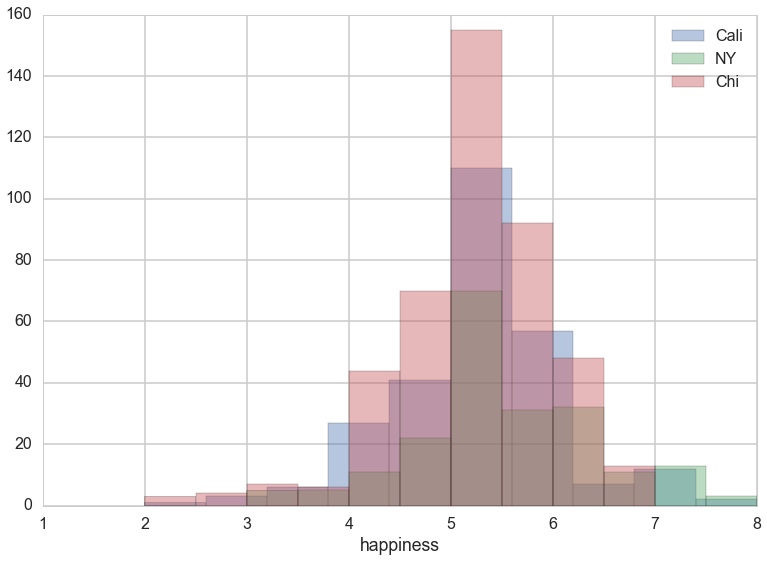

In [159]:
import seaborn as sns
ax = sns.distplot(tweet_df.happiness[tweet_df.city=='California'], bins=10, kde=None, label='Cali')
sns.distplot(tweet_df.happiness[tweet_df.city=='New York'], bins=10, kde=None, ax=ax, label='NY')
sns.distplot(tweet_df.happiness[tweet_df.city=='Chicago'], bins=10, kde=None, ax=ax, label='Chi')
ax.legend()

In [160]:
def norm(col):
    return (col - np.mean(col))/(max(col) - min(col))

tweet_df.norm_happ = norm(tweet_df.happiness)

#add boolean tweet positivity indicator
tweet_df['bool_happ'] = pd.Series(tweet_df.norm_happ > 0)

print 'Ratio positive tweets in NY: ' + str(np.mean(tweet_df[tweet_df.city=='New York'].bool_happ))
print 'Ratio positive tweets in Chicago: ' + str(np.mean(tweet_df[tweet_df.city=='Chicago'].bool_happ))

Ratio positive tweets in NY: 0.566502463054
Ratio positive tweets in Chicago: 0.495475113122


In [161]:
#update true, false to 0 , 1 in order to run classifier
length = len(tweet_df['bool_happ'])
list1= range(0,length)
for i in list1:
    value=tweet_df.iloc[i]['bool_happ']
    if value == True:
        tweet_df.ix[i,'bool_happ']='1'
    else:
        tweet_df.ix[i,'bool_happ']='0'

In [162]:
tweet_df.head()

,bounding_box,city,country,created_at,friends_count,text,tid,timestamp,uid,happiness,bool_happ
0,"{u'type': u'Polygon', u'coordinates': [[[-83.2...",Detroit,United States,Mon Nov 23 20:15:24 +0000 2015,400,"I don't know what it is, but the fight scenes ...",6.688856e+17,1.448310e+12,434421684,4.727273,0
9,"{u'type': u'Polygon', u'coordinates': [[[-90.3...",St Louis,United States,Mon Nov 23 20:15:25 +0000 2015,2216,Wonder How It Feels Outside 😮,6.688856e+17,1.448310e+12,154255312,5.666667,1
15,"{u'type': u'Polygon', u'coordinates': [[[-82.9...",Gahanna,United States,Mon Nov 23 20:15:25 +0000 2015,252,and not @ the person they're talking about,6.688856e+17,1.448310e+12,2995281392,5.500000,1
17,"{u'type': u'Polygon', u'coordinates': [[[-84.6...",Villa Hills,United States,Mon Nov 23 20:15:25 +0000 2015,384,St. John's might be the worst team in the country,6.688856e+17,1.448310e+12,2828935165,4.800000,0
18,"{u'type': u'Polygon', u'coordinates': [[[-117....",San Diego,United States,Mon Nov 23 20:15:25 +0000 2015,69,yesterday i was with all my brothers trippen o...,6.688856e+17,1.448310e+12,2243590122,5.285714,1


In [163]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(tweet_df.shape[0]), train_size=0.7)

In [164]:
mask=np.ones(tweet_df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [165]:
mask.shape, mask.sum()

((31314,), 21919)

In [166]:
"""
Function
--------
cv_optimize

Inputs
------
clf : an instance of a scikit-learn classifier
parameters: a parameter grid dictionary thats passed to GridSearchCV (see above)
X: a samples-features matrix in the scikit-learn style
y: the response vectors of 1s and 0s (+ives and -ives)
n_folds: the number of cross-validation folds (default 5)
score_func: a score function we might want to pass (default python None)
   
Returns
-------
The best estimator from the GridSearchCV, after the GridSearchCV has been used to
fit the model.
     
Notes
-----
see do_classify and the code below for an example of how this is used
"""
#your code here
#code re-used from lab 5
from sklearn.grid_search import GridSearchCV
def cv_optimize(clf, parameters, X, y, n_folds, score_func):
    n_folds=5
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X, y)
    print "BEST PARAMS", gs.best_params_
    best = gs.best_estimator_
    return best

In [173]:
from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [174]:
%%time
clfsvm, Xtrain, ytrain, Xtest, ytest   = do_classify(LogisticRegression(), {"C": [0.01, 0.1, 1, 10, 100]}, tweet_df, ['happiness'], 'bool_happ','1', mask=mask)

using mask
BEST PARAMS {'C': 1}
############# based on standard predict ################
Accuracy on training data: 1.00
Accuracy on test data:     1.00
[[4539    9]
 [   0 4847]]
########################################################
CPU times: user 367 ms, sys: 3.44 ms, total: 370 ms
Wall time: 369 ms


In [ ]:
#trying a different approach

In [216]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweet_df['happiness'], tweet_df['bool_happ'],test_size=0.7)



In [217]:
y_train=y_train.reshape(1,9394)
X_train=X_train.reshape(1,9394)



In [218]:
clf1 = LinearRegression()
clf1.fit(X_train, y_train)
predicted_train = clf1.predict(X_train)
trains=X_train.reshape(1,-1).flatten()

print clf1.coef_, clf1.intercept_

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] [ 0.  1.  0. ...,  0.  0.  0.]


In [209]:
len(trains)

9394

In [211]:
clf1.score(X_train, y_train)
#could make this work

1.0

In [ ]:
#different approach using logistic regression

In [220]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweet_df['happiness'], tweet_df['bool_happ'],test_size=0.7)

In [228]:
y_train=y_train.reshape(-1,1)
X_train=X_train.reshape(-1,1)

In [242]:
clf2 = LogisticRegression()
clf2.fit(tweet_df['happiness'].reshape(-1,1), tweet_df['bool_happ'])
predicted_train = clf2.predict(X_train)
trains=X_train.reshape(1,-1).flatten()

print clf2.coef_, clf1.intercept_

[[ 10.45356568]] [-34.73552918]


In [258]:
clf2.score(X_train, y_train)

0.99765807962529274

In [243]:
probsw = clf2.predict_proba(tweet_df['happiness'].reshape(-1,1))[:, 1]
predictsw = clf2.predict(tweet_df['happiness'].reshape(-1,1))

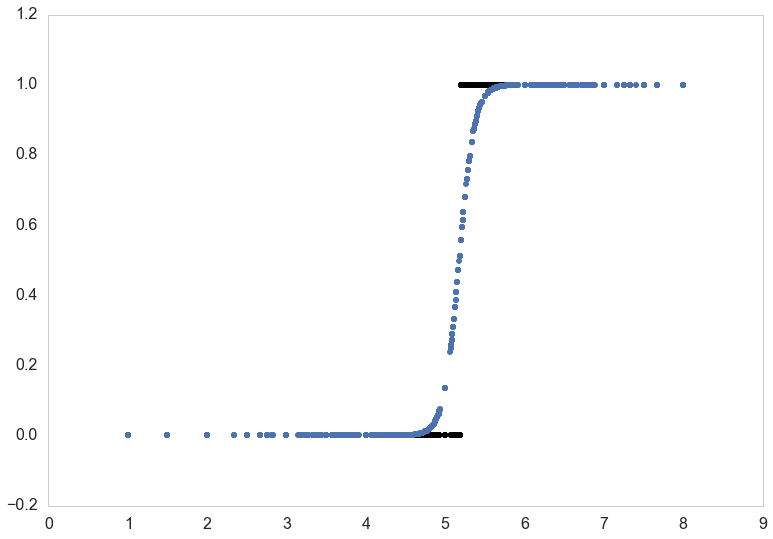

In [256]:
plt.scatter(tweet_df['happiness'], tweet_df['bool_happ'],color="black")
axes=plt.gca()
axes.grid(False)
plt.plot(tweet_df['happiness'], probsw, '.')


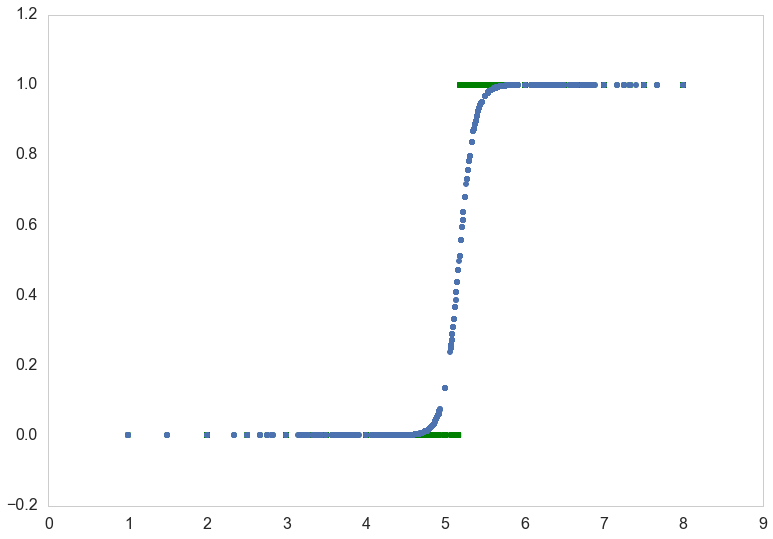

In [257]:
axes=plt.gca()
axes.grid(False)
plt.plot(tweet_df['happiness'], probsw, '.')
plt.scatter(tweet_df['happiness'], predictsw, marker='s', color="green")